In [1]:
import erroranalysis as ea
import numpy as np
from scipy.constants import k as k_b
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os,sys,glob
import numpy as np
import pimcscripts.pimchelp as pimchelp
import pimcscripts.MCstat as MCstat
from collections import defaultdict
import argparse 
import subprocess

from joblib import Parallel, delayed
import multiprocessing
directory_paths = {
    r'$N_g = 0$': '/lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/NOOctober9/MERGED/',
    r'$N_g = 1$': '/lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/FIRSTSeptember22/',
    r'$N_g = 2$': '/lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/SECONDSeptember22/',
    r'$N_g = 3$':'/lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/THIRDSeptember22/',
    r'$N_g = \infty$':'/lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/FULLOctober9/MERGED/'
}
for key, value in directory_paths.items():
    print(f"Key: {key}, Value: {value}")

Key: $N_g = 0$, Value: /lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/NOOctober9/MERGED/
Key: $N_g = 1$, Value: /lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/FIRSTSeptember22/
Key: $N_g = 2$, Value: /lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/SECONDSeptember22/
Key: $N_g = 3$, Value: /lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/THIRDSeptember22/
Key: $N_g = \infty$, Value: /lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/FULLOctober9/MERGED/


In [2]:
#%run ~/.local/bin/merge.py -u -100 /lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/FULLSeptember3/
#directory_paths[r'$N_g = 0$']=value+'MERGED/'
print(directory_paths[r'$N_g = 0$'])

/lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/NOOctober9/MERGED/


In [3]:
def compressibility(N,N2,volume=1.0,k_B=1.0,T=1.0):
    pf = 1/(volume*k_B*T)
    return pf*(((N2 - (N**2)))/1)
def heatcapacity(E,E2,k_B=1.0,T=1.0):
    pf = 1/(k_B*(T**2))
    return pf*(((E2 - (E**2))))

In [4]:
folder_name = "MERGED"
for key, value in directory_paths.items():
    directory = value
    if key == r'$N_g = 0$' or key == r'$N_g = \infty$':
        for i in range(-125, -14):
            %run ~/.local/bin/merge.py -u {i} {directory}
        #directory_paths[key]=value+'MERGED/'
for key, value in directory_paths.items():
    directory = value
    if key == r'$N_g = 0$' or key == r'$N_g = \infty$':
        directory_paths[key]=value+'MERGED/'

Merged data files:
gce-estimator-01.000-010.000--125.000-0.00313-fb6c3ff8-20b1-40bf-9bc0-4f9bc17e3473.dat     16384
gce-super-01.000-010.000--125.000-0.00313-fb6c3ff8-20b1-40bf-9bc0-4f9bc17e3473.dat     16384
gce-planeavedensity-01.000-010.000--125.000-0.00313-fb6c3ff8-20b1-40bf-9bc0-4f9bc17e3473.dat     42025
gce-lineardensity-01.000-010.000--125.000-0.00313-fb6c3ff8-20b1-40bf-9bc0-4f9bc17e3473.dat     16384
gce-number-01.000-010.000--125.000-0.00313-fb6c3ff8-20b1-40bf-9bc0-4f9bc17e3473.dat     16384
Merged data files:
gce-estimator-01.000-010.000--124.000-0.00313-9c63726d-cf74-4a35-a373-c1038bad0e14.dat     16384
gce-super-01.000-010.000--124.000-0.00313-9c63726d-cf74-4a35-a373-c1038bad0e14.dat     16384
gce-planeavedensity-01.000-010.000--124.000-0.00313-9c63726d-cf74-4a35-a373-c1038bad0e14.dat     42025
gce-lineardensity-01.000-010.000--124.000-0.00313-9c63726d-cf74-4a35-a373-c1038bad0e14.dat     16384
gce-number-01.000-010.000--124.000-0.00313-9c63726d-cf74-4a35-a373-c1038bad0e14.

gce-super-01.000-010.000--093.000-0.00313-d11a62a0-67d9-41f0-af9e-930d0c20e855.dat     22661
gce-planeavedensity-01.000-010.000--093.000-0.00313-d11a62a0-67d9-41f0-af9e-930d0c20e855.dat     42025
gce-lineardensity-01.000-010.000--093.000-0.00313-d11a62a0-67d9-41f0-af9e-930d0c20e855.dat     22661
gce-number-01.000-010.000--093.000-0.00313-d11a62a0-67d9-41f0-af9e-930d0c20e855.dat     22661
Merged data files:
gce-estimator-01.000-010.000--092.000-0.00313-7310fde1-94f2-448b-be52-ce288000024a.dat     24612
gce-super-01.000-010.000--092.000-0.00313-7310fde1-94f2-448b-be52-ce288000024a.dat     24612
gce-planeavedensity-01.000-010.000--092.000-0.00313-7310fde1-94f2-448b-be52-ce288000024a.dat     42025
gce-lineardensity-01.000-010.000--092.000-0.00313-7310fde1-94f2-448b-be52-ce288000024a.dat     24612
gce-number-01.000-010.000--092.000-0.00313-7310fde1-94f2-448b-be52-ce288000024a.dat     24612
Merged data files:
gce-estimator-01.000-010.000--091.000-0.00313-b9b6e264-d689-44ba-9b5b-093406e6a354.

gce-planeavedensity-01.000-010.000--061.000-0.00313-4d2704db-5a71-4527-bd04-5c7198032463.dat     42025
gce-lineardensity-01.000-010.000--061.000-0.00313-4d2704db-5a71-4527-bd04-5c7198032463.dat     22992
gce-number-01.000-010.000--061.000-0.00313-4d2704db-5a71-4527-bd04-5c7198032463.dat     22992
Merged data files:
gce-estimator-01.000-010.000--060.000-0.00313-8475b779-eca5-44d4-853f-3d260e9e51c9.dat     23018
gce-super-01.000-010.000--060.000-0.00313-8475b779-eca5-44d4-853f-3d260e9e51c9.dat     23018
gce-planeavedensity-01.000-010.000--060.000-0.00313-8475b779-eca5-44d4-853f-3d260e9e51c9.dat     42025
gce-lineardensity-01.000-010.000--060.000-0.00313-8475b779-eca5-44d4-853f-3d260e9e51c9.dat     23018
gce-number-01.000-010.000--060.000-0.00313-8475b779-eca5-44d4-853f-3d260e9e51c9.dat     23018
Merged data files:
gce-estimator-01.000-010.000--059.000-0.00313-aaa0b801-6210-4eec-947a-933bd2692975.dat     23867
gce-super-01.000-010.000--059.000-0.00313-aaa0b801-6210-4eec-947a-933bd2692975.

gce-lineardensity-01.000-010.000--029.000-0.00313-6e1dda1a-e504-4557-aff1-d70ca2104f0a.dat      2685
gce-number-01.000-010.000--029.000-0.00313-6e1dda1a-e504-4557-aff1-d70ca2104f0a.dat      2685
Merged data files:
gce-estimator-01.000-010.000--028.000-0.00313-8c004901-478f-436e-8a63-5289f5fafcee.dat      2711
gce-super-01.000-010.000--028.000-0.00313-8c004901-478f-436e-8a63-5289f5fafcee.dat      2711
gce-planeavedensity-01.000-010.000--028.000-0.00313-8c004901-478f-436e-8a63-5289f5fafcee.dat     42025
gce-lineardensity-01.000-010.000--028.000-0.00313-8c004901-478f-436e-8a63-5289f5fafcee.dat      2711
gce-number-01.000-010.000--028.000-0.00313-8c004901-478f-436e-8a63-5289f5fafcee.dat      2711
Merged data files:
gce-estimator-01.000-010.000--027.000-0.00313-5d1b0071-f6ed-4c78-aaa4-a90e1c77136c.dat      2559
gce-super-01.000-010.000--027.000-0.00313-5d1b0071-f6ed-4c78-aaa4-a90e1c77136c.dat      2559
gce-planeavedensity-01.000-010.000--027.000-0.00313-5d1b0071-f6ed-4c78-aaa4-a90e1c77136c.

gce-lineardensity-01.000-010.000--108.000-0.00313-35870816-d9a6-451f-8c0e-33e4c7ff3298.dat     71106
gce-number-01.000-010.000--108.000-0.00313-35870816-d9a6-451f-8c0e-33e4c7ff3298.dat     71114
Merged data files:
gce-estimator-01.000-010.000--107.000-0.00313-2a9aeefb-0dd3-4225-aeda-c56af1951131.dat     58915
gce-super-01.000-010.000--107.000-0.00313-2a9aeefb-0dd3-4225-aeda-c56af1951131.dat     58916
gce-planeavedensity-01.000-010.000--107.000-0.00313-2a9aeefb-0dd3-4225-aeda-c56af1951131.dat     42025
gce-lineardensity-01.000-010.000--107.000-0.00313-2a9aeefb-0dd3-4225-aeda-c56af1951131.dat     58916
gce-number-01.000-010.000--107.000-0.00313-2a9aeefb-0dd3-4225-aeda-c56af1951131.dat     57493
Merged data files:
gce-estimator-01.000-010.000--106.000-0.00313-9ad7a7a8-f224-4eba-8b17-8577fe209346.dat     55188
gce-super-01.000-010.000--106.000-0.00313-9ad7a7a8-f224-4eba-8b17-8577fe209346.dat     55401
gce-planeavedensity-01.000-010.000--106.000-0.00313-9ad7a7a8-f224-4eba-8b17-8577fe209346.

gce-lineardensity-01.000-010.000--076.000-0.00313-ee992845-927b-4b89-8e79-8d5ae3248ad6.dat     40826
gce-number-01.000-010.000--076.000-0.00313-ee992845-927b-4b89-8e79-8d5ae3248ad6.dat     40826
Merged data files:
gce-estimator-01.000-010.000--075.000-0.00313-9c3fd5b4-bf62-46fc-a542-d8ecacef2ccf.dat     39124
gce-super-01.000-010.000--075.000-0.00313-9c3fd5b4-bf62-46fc-a542-d8ecacef2ccf.dat     39124
gce-planeavedensity-01.000-010.000--075.000-0.00313-9c3fd5b4-bf62-46fc-a542-d8ecacef2ccf.dat     42025
gce-lineardensity-01.000-010.000--075.000-0.00313-9c3fd5b4-bf62-46fc-a542-d8ecacef2ccf.dat     39124
gce-number-01.000-010.000--075.000-0.00313-9c3fd5b4-bf62-46fc-a542-d8ecacef2ccf.dat     39124
Merged data files:
gce-estimator-01.000-010.000--074.000-0.00313-1a446c23-a23e-45c8-a023-b3a3cc7d9320.dat     38993
gce-super-01.000-010.000--074.000-0.00313-1a446c23-a23e-45c8-a023-b3a3cc7d9320.dat     38993
gce-planeavedensity-01.000-010.000--074.000-0.00313-1a446c23-a23e-45c8-a023-b3a3cc7d9320.

gce-lineardensity-01.000-010.000--044.000-0.00313-b8750ac8-f64a-4d4b-9be4-fd3b631633fc.dat      9248
gce-number-01.000-010.000--044.000-0.00313-b8750ac8-f64a-4d4b-9be4-fd3b631633fc.dat      9248
Merged data files:
gce-estimator-01.000-010.000--043.000-0.00313-a2653032-cbef-48e1-a50e-cf9667a5f47b.dat     15844
gce-super-01.000-010.000--043.000-0.00313-a2653032-cbef-48e1-a50e-cf9667a5f47b.dat     15844
gce-planeavedensity-01.000-010.000--043.000-0.00313-a2653032-cbef-48e1-a50e-cf9667a5f47b.dat     42025
gce-lineardensity-01.000-010.000--043.000-0.00313-a2653032-cbef-48e1-a50e-cf9667a5f47b.dat     15844
gce-number-01.000-010.000--043.000-0.00313-a2653032-cbef-48e1-a50e-cf9667a5f47b.dat     15844
Merged data files:
gce-estimator-01.000-010.000--042.000-0.00313-4ba8fd9a-de12-4b25-ae88-7ede713ca931.dat      9566
gce-super-01.000-010.000--042.000-0.00313-4ba8fd9a-de12-4b25-ae88-7ede713ca931.dat      9566
gce-planeavedensity-01.000-010.000--042.000-0.00313-4ba8fd9a-de12-4b25-ae88-7ede713ca931.

In [6]:
for key, value in directory_paths.items():
    print(f"Key: {key}, Value: {value}")

Key: $N_g = 0$, Value: /lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/NOOctober9/MERGED/
Key: $N_g = 1$, Value: /lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/FIRSTSeptember22/
Key: $N_g = 2$, Value: /lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/SECONDSeptember22/
Key: $N_g = 3$, Value: /lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/THIRDSeptember22/
Key: $N_g = \infty$, Value: /lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/FULLOctober9/MERGED/


In [4]:
data={}
all_file_names = os.listdir('/lustre/isaac/scratch/gerwin2/local/pimc/build/OUTPUT/NOOctober9/MERGED/')
gce_estimator_files = [f for f in all_file_names if f.startswith('gce-estimator-')]
num = len(gce_estimator_files)-3
box_volume = 14.757072880486835*17.04*10#\AA^3
volume = box_volume
temperature = 1 #K
skip = 500
for key, value in directory_paths.items():
    all_file_names = os.listdir(value)
    gce_estimator_files = [f for f in all_file_names if f.startswith('gce-estimator-')]
    gce_estimator_files = pimchelp.sortFileNames(gce_estimator_files)
    data[key] ={'u':np.zeros([num],float),'aveN':np.zeros([num],float),'errN':np.zeros([num],float),'aveKappa':np.zeros([num],float),'errKappa':np.zeros([num],float),'aveC':np.zeros([num],float),'errC':np.zeros([num],float)}
    for i in range(num):
        j=i+3
        headers = pimchelp.getHeadersFromFile(value+'/'+gce_estimator_files[j])
        param = pimchelp.getFileNameParameters(gce_estimator_files[j])
        chem = float(param[4])
        estData = np.loadtxt(value+'/'+gce_estimator_files[j],ndmin=2)
        N = estData[:,headers.index('N')]
        E = estData[:,headers.index('E')]
        boot = ea.bootstrap(N)
        data[key]['u'][i] = chem
        data[key]['aveN'][i] = boot[0]
        data[key]['errN'][i] = boot[1]
        κ_avg, κ_err = ea.bootstrap_on_function(compressibility,N[skip:],N[skip:]**2,volume=volume,k_B=1,T=temperature)
        data[key]['aveKappa'][i] = κ_avg
        data[key]['errKappa'][i] = κ_err
        C_avg, C_err = ea.bootstrap_on_function(heatcapacity,E,E**2,k_B=1,T=temperature)
        data[key]['aveC'][i] = C_avg
        data[key]['errC'][i] = C_err

/lustre/isaac/scratch/gerwin2/CondaEnv/PIMCENV/lib/python3.9/site-packages/erroranalysis/ea.py:22: RuntimeWarning: Mean of empty slice.
  _bootstrap_avg = data_array[:,np.random.randint(N, size=(N,bootstrap_size))].mean(axis=1)
/nfs/home/gerwin2/.local/lib/python3.9/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [5]:
print(data['$N_g = 0$']['u'][:])
print(data['$N_g = 0$']['aveN'][70:])

[-122. -121. -120. -119. -118. -117. -116. -115. -114. -113. -112. -111.
 -110. -109. -108. -107. -106. -105. -104. -103. -102. -101. -100.  -99.
  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.
  -86.  -85.  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.
  -74.  -73.  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.
  -62.  -61.  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.
  -50.  -49.  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.
  -38.  -37.  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.
  -26.  -25.  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.]
[27.99937255 25.         27.97462951 25.01073521 27.99736242 27.99991421
 28.         27.99994354 28.         25.         28.         28.
 28.         28.         28.00000015 28.00000441 28.00000651 28.00004124
 28.00011102 28.00019642 28.00062463 28.00166151 28.00473392 28.0131605
 28.03288669 30.19776733 30.58951595 33.50096008 34.8398014

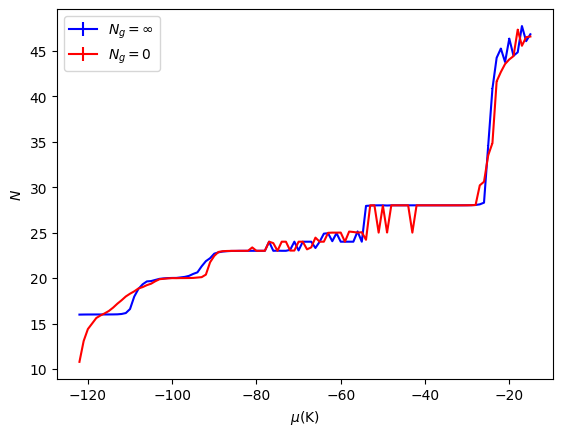

In [6]:
#plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(data[r'$N_g = \infty$']['u'],data[ r'$N_g = \infty$']['aveN'],yerr=data[ r'$N_g = \infty$']['errN'],color='blue',label=r'$N_g = \infty$')
#plt.errorbar(data[r'$N_g = 1$']['u'],data[ r'$N_g = 1$']['aveN'],yerr=data[ r'$N_g = 1$']['errN'],color='black',label=r'$N_g = 3$')
plt.errorbar(data[ r'$N_g = 0$']['u'],data[ r'$N_g = 0$']['aveN'],yerr=data[ r'$N_g = 0$']['errN'],color='red',label=r'$N_g = 0$')

plt.ylabel(r'$N$',fontsize=10)
plt.xlabel(r'$\mu$(K)',fontsize=10)
#plt.xlim(-40,-15)
#plt.ylim(25,50)
plt.legend(loc='upper left')
plt.show()

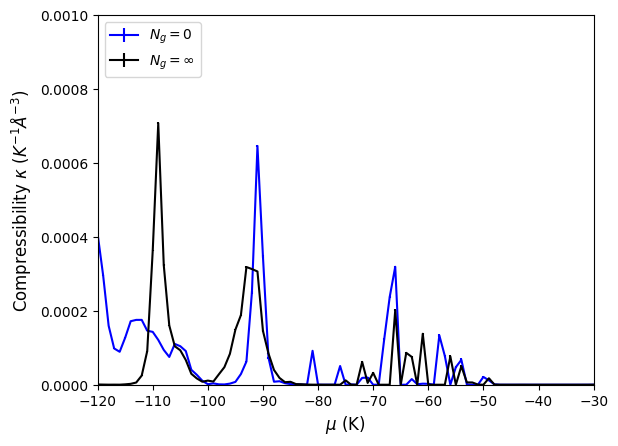

In [7]:
blue_color = (0, 0, 1)      # (R, G, B) = (0, 0, 1) for blue
black_color = (0, 0, 0)     # (R, G, B) = (0, 0, 0) for black

# Plot with error bars and custom RGB colors
plt.errorbar(data[r'$N_g = 0$']['u'], data[r'$N_g = 0$']['aveKappa'], yerr=data[r'$N_g = 0$']['errKappa'], color=blue_color, label=r'$N_g = 0$')
plt.errorbar(data[r'$N_g = \infty$']['u'], data[r'$N_g = \infty$']['aveKappa'], yerr=data[r'$N_g = \infty$']['errKappa'], color=black_color, label=r'$N_g = \infty$')
#plt.errorbar(data[ r'$N_g = 3$']['u'],data[ r'$N_g = 3$']['aveKappa'],yerr=data[ r'$N_g = 3$']['errKappa'],color='green')
#plt.errorbar(data[ r'$N_g = 2$']['u'],data[ r'$N_g = 2$']['aveKappa'],yerr=data[ r'$N_g = 2$']['errKappa'],color='black')
#plt.errorbar(data[ r'$N_g = 1$']['u'],data[ r'$N_g = 1$']['aveKappa'],yerr=data[ r'$N_g = 1$']['errKappa'],color='orange')
#plt.ylim(0,2e-6)
#plt.ylim(0,2.5e-6)
plt.xlim(-120,-30)
#plt.yscale('log')
plt.ylim(0,.001)
plt.ylabel(r'Compressibility $\kappa$ $(K^{-1}Å^{-3})$',fontsize=12)
plt.xlabel(r'$\mu$ (K)',fontsize=12)
plt.legend(loc='upper left')
plt.savefig('Images/Fig5.pdf', format='pdf')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


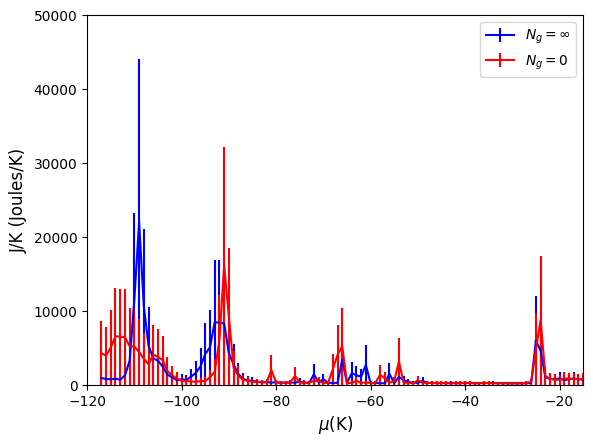

In [15]:
#plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(data[r'$N_g = \infty$']['u'],data[ r'$N_g = \infty$']['aveC'],yerr=data[ r'$N_g = \infty$']['aveC'],color='blue',label=r'$N_g = \infty$')
#plt.errorbar(data[ r'$N_g = 3$']['u'],data[ r'$N_g = 3$']['aveC'],yerr=data[ r'$N_g = 3$']['aveC'],color='green')
#plt.errorbar(data[ r'$N_g = 2$']['u'],data[ r'$N_g = 2$']['aveC'],yerr=data[ r'$N_g = 2$']['aveC'],color='black')
#plt.errorbar(data[ r'$N_g = 1$']['u'],data[ r'$N_g = 1$']['aveC'],yerr=data[ r'$N_g = 1$']['aveC'],color='orange')

plt.errorbar(data[ r'$N_g = 0$']['u'],data[ r'$N_g = 0$']['aveC'],yerr=data[ r'$N_g = 0$']['aveC'],color='red',label=r'$N_g = 0$')
plt.ylim(0,5e4)
plt.xlim(-120,-15)
plt.ylabel(r'K/J (Joules/K)',fontsize=12)
plt.xlabel(r'$\mu$(K)',fontsize=12)
plt.legend(loc='upper right')
plt.savefig('Images/Fig6.eps', format='eps')

plt.show()

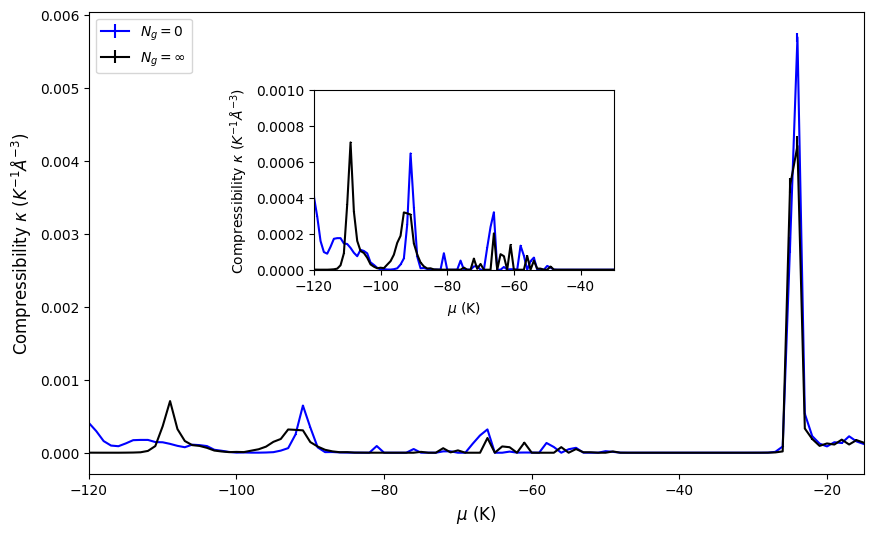

In [8]:
import matplotlib.pyplot as plt

# Your existing data and plotting code...

# Define RGB values for blue and black
blue_color = (0, 0, 1)      # (R, G, B) = (0, 0, 1) for blue
black_color = (0, 0, 0)     # (R, G, B) = (0, 0, 0) for black

# Create the main plot
plt.figure(figsize=(10, 6))

# Plot with error bars and custom RGB colors
plt.errorbar(data[r'$N_g = 0$']['u'], data[r'$N_g = 0$']['aveKappa'], yerr=data[r'$N_g = 0$']['errKappa'], color=blue_color, label=r'$N_g = 0$')
plt.errorbar(data[r'$N_g = \infty$']['u'], data[r'$N_g = \infty$']['aveKappa'], yerr=data[r'$N_g = \infty$']['errKappa'], color=black_color, label=r'$N_g = \infty$')
plt.xlim(-120, -15)
#plt.ylim(0, 0.001)
plt.ylabel(r'Compressibility $\kappa$ $(K^{-1}Å^{-3})$', fontsize=12)
plt.xlabel(r'$\mu$ (K)', fontsize=12)
plt.legend(loc='upper left')

# Create the inset axes in the top right corner
axins = plt.axes([0.35, 0.45, 0.3, 0.3])  # (left, bottom, width, height)

# Plot the data in the inset
axins.errorbar(data[r'$N_g = 0$']['u'], data[r'$N_g = 0$']['aveKappa'], yerr=data[r'$N_g = 0$']['errKappa'], color=blue_color, label=r'$N_g = 0$')
axins.errorbar(data[r'$N_g = \infty$']['u'], data[r'$N_g = \infty$']['aveKappa'], yerr=data[r'$N_g = \infty$']['errKappa'], color=black_color, label=r'$N_g = \infty$')
axins.set_xlim(-120, -30)
axins.set_ylim(0, 0.001)

# Customize the inset appearance
axins.set_xlabel(r'$\mu$ (K)')
axins.set_ylabel(r'Compressibility $\kappa$ $(K^{-1}Å^{-3})$')
plt.savefig('Images/Fig5.pdf', format='pdf')
